Using TensorFlow backend.


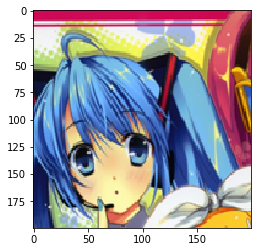

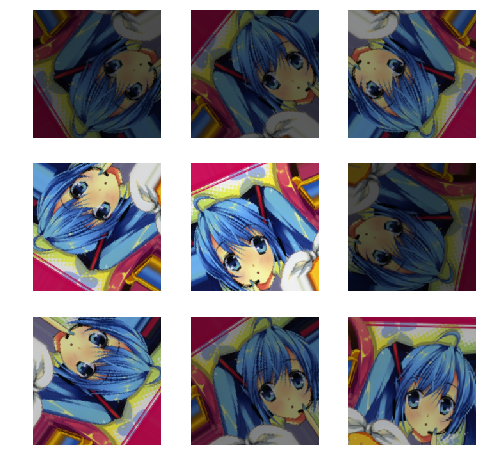

[[[0.4666667  0.18039216 0.26666668]
  [0.47058827 0.18039216 0.26666668]
  [0.47058827 0.18039216 0.26666668]
  ...
  [0.5686275  0.10588236 0.2784314 ]
  [0.54901963 0.1137255  0.27058825]
  [0.54901963 0.11764707 0.27058825]]

 [[0.4039216  0.12156864 0.24313727]
  [0.4039216  0.12156864 0.24313727]
  [0.4039216  0.12156864 0.24313727]
  ...
  [0.5686275  0.10588236 0.2784314 ]
  [0.54901963 0.1137255  0.27058825]
  [0.54901963 0.11764707 0.27058825]]

 [[0.3921569  0.10588236 0.2392157 ]
  [0.3921569  0.10588236 0.2392157 ]
  [0.3921569  0.10588236 0.2392157 ]
  ...
  [0.5686275  0.10588236 0.2784314 ]
  [0.54901963 0.1137255  0.27058825]
  [0.54901963 0.11764707 0.27058825]]

 ...

 [[0.5764706  0.5294118  0.4039216 ]
  [0.61960787 0.5019608  0.13333334]
  [0.7058824  0.5647059  0.1137255 ]
  ...
  [0.08235294 0.14117648 0.34509805]
  [0.08235294 0.14117648 0.34509805]
  [0.08235294 0.14117648 0.34509805]]

 [[0.5764706  0.5294118  0.40000004]
  [0.62352943 0.5019608  0.13333334]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#kerasインポート
from keras.models import model_from_json
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, array_to_img, load_img, random_rotation, random_zoom, random_shift
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils


%matplotlib inline

#------------変数宣言------------
img_size = 200

#csvのファイルパスを記載
csv_filepath = 'filename_test.csv'

#水増し処理の種類を記載
img_add = 9

#------------処理ここから------------


#csvからファイルパスを読み込む
csv_file = pd.read_csv(csv_filepath, encoding="UTF-8")#もしくわUTF-8

#csvに記載しているファイルパス、ラベル、総数を格納
fnames = csv_file['filepath']
labels = csv_file['label']
fnames_total = len(fnames)

#データセットを格納する変数の初期化
img_train = np.zeros((fnames_total,img_size,img_size,3))

#データセットの格納
#前処理する場合はここでやる
for i,fname in enumerate(fnames):

    temp_img = load_img(fname,target_size=(img_size,img_size))
    #配列に格納する
    img_train[i] = img_to_array(temp_img)

#水増し前の画像の表示
plt.imshow(img_train[0]/255)
plt.show()

#水増し処理を行う
#ImageDataGeneratorの生成
datagen = ImageDataGenerator(
    rescale=1. / 255,    #正規化
    rotation_range=180,    #回転
    vertical_flip=True,    #上下#反転
    horizontal_flip=True,    #左右反転
    brightness_range=[0.3, 1.0]    #明度調整 0だと暗く、1だと明るい
)

gen = datagen.flow(img_train, batch_size=fnames_total) 

# Python ジェネレーターで9枚生成して、表示する。
plt.figure(figsize=(8, 8))
for i in range(img_add):
    batches = next(gen)  # (NumBatches, Height, Width, Channels) の4次元データを返す。
    # 画像として表示するため、3次元データにし、float から uint8 にキャストする。
    gen_img = batches[0]

    plt.subplot(3, 3, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
plt.show()
print(gen_img)